In [3]:
from decode_logs import *
import os 

In [2]:
output_dir = "tmp/" + get_current_time()
strategy_type = "kalman"
execution_command = "python backtest_pair.py --strategy_type {} --output_dir {}".format(strategy_type, output_dir)

os.system("rm -rf tmp")
os.system(execution_command)

0

In [3]:
df1, df2 = Decoder.get_strategy_status(output_dir)
dic = Decoder.get_strategy_performance(output_dir)

In [4]:
df1.head(5)

,allow_trade,alpha,buy_amt,buy_stk,data0,data1,date,enter_threshold_size,exit_threshold_size,initial_cash,...,portfolio_value,qty0,qty1,sell_amt,sell_stk,spread,spread_std,status,up_medium,upper_limit
0,False,0.825526,NaN,None,40.275,51.795,2018-05-01,2.0,0.5,NaN,...,1000000.0,0,0,NaN,None,-0.003483,0.046979,0,0.023489,0.093958
1,True,0.825526,NaN,None,40.815,52.345,2018-05-02,2.0,0.5,NaN,...,1000000.0,0,0,NaN,None,0.001116,0.046979,0,0.023489,0.093958
2,True,0.829269,NaN,None,40.485,53.625,2018-05-03,2.0,0.5,NaN,...,1000000.0,0,0,NaN,None,-0.027802,0.046979,0,0.023489,0.093958
3,True,0.628990,NaN,None,41.555,54.165,2018-05-04,2.0,0.5,NaN,...,1000000.0,0,0,NaN,None,0.012612,0.046979,0,0.023489,0.093958
4,True,0.690333,NaN,None,40.365,54.155,2018-05-07,2.0,0.5,NaN,...,1000000.0,0,0,NaN,None,-0.025299,0.046979,0,0.023489,0.093958


In [5]:
df2.head(10)

,index,spread,date,latest_trade_action,sell_stk,buy_stk,buy_amt,sell_amt
0,60,0.101615,2018-07-26,short_spread,AAN,AER,23650.0,27300.0
1,61,-0.016250,2018-07-27,exit_spread,None,None,NaN,NaN
2,62,-0.118242,2018-07-30,long_spread,AER,AAN,34242.0,25654.0
3,69,-0.021204,2018-08-08,exit_spread,None,None,NaN,NaN
4,124,-0.098352,2018-10-25,long_spread,AER,AAN,34578.0,30518.0
5,130,-0.011067,2018-11-02,exit_spread,None,None,NaN,NaN


In [7]:
dic

{'avg_holding_period': 4.666666666666667,
 'endcash': 1177419.7167409933,
 'n_trades': 3,
 'pair': 'AAN-AER',
 'profit': 0.17741971674099333,
 'returnstd': 7361.272303626742,
 'sharperatio': None,
 'startcash': 1000000}

### Impact of loss limit

In [126]:
import matplotlib.pyplot as plt
import numpy as np
import os

plt.rcParams["patch.force_edgecolor"] = True

def plot_rs_dist(rs, fig_name, fig_title):
#     return_in_percent = np.array(rs) / rl_constants.initial_cash
    stat = plt.hist(rs, bins=20)
    
    mean = rs.mean()
    median = np.median(rs)
    
    plt.axvline(mean, color='r', linestyle='dashed', linewidth=1, label='Mean: {:.3f}'.format(mean))
    plt.axvline(median, color='y', linestyle='dashed', linewidth=1, label='Median: {:.3f}'.format(median))
    
    plt.gcf().set_size_inches(14, 7)
    
    if len(fig_title) != 0:
        plt.suptitle(fig_title)
    plt.xlabel('return')
    plt.ylabel('frequency')
    plt.legend(loc='upper right')
    print(stat)
#     plt.savefig(join(plot_folder_path, fig_name+'.png'))
    print('Number of pairs:', len(rs))
    print('Mean return over all pairs: {:.4f}'.format(np.mean(rs)))
    
def plot_rs_dist(rs, fig_name, fig_title, mean=False, median=False, color=None, methodName=None):
    return_in_percent = np.array(rs)
#     stat = plt.hist(return_in_percent, bins=30, weights=np.ones(len(return_in_percent)) / len(return_in_percent))
    y, binEdges = np.histogram(return_in_percent, bins=20, density=True)
    
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    plt.plot(bincenters,y,'-', color=color, label=methodName)
    
    mean_stat = return_in_percent.mean()
    median_stat = np.median(return_in_percent)
    
    if mean:
        plt.axvline(mean_stat, color=color, linestyle='dashed', linewidth=1, label=methodName+' Mean: {:.3f}'.format(mean_stat))
    if median:
        plt.axvline(median_stat, color=color, linestyle='dashed', linewidth=1, label=methodName+' Median: {:.3f}'.format(median_stat))
    
    plt.gcf().set_size_inches(14, 7)
#     plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
#     plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
    
    if len(fig_title) != 0:
        plt.suptitle(fig_title)
    plt.xlabel('Standard Deviation of returns')
    plt.ylabel('density of the distribution of all pairs')
    plt.legend(loc='upper right')
#     print(stat)
#     plt.savefig(join(plot_folder_path, fig_name+'.png'))
    print('Number of pairs:', len(return_in_percent))
    print('Mean return over all pairs: {:.4f}'.format(np.mean(return_in_percent)))

In [127]:
df = {}
output_dir = {}
output_dir['-0.05'] = 'output/grid-search-2019-04-09_23-53-15-774'
output_dir['-0.1'] = 'output/grid-search-2019-04-09_22-23-07-888'
output_dir['-0.2'] = 'output/grid-search-2019-04-09_22-26-38-005'
output_dir['-0.3'] = 'output/grid-search-2019-04-09_22-30-29-460'
output_dir['-0.4'] = 'output/grid-search-2019-04-09_22-33-18-033'
output_dir['-0.5'] = 'output/grid-search-2019-04-09_22-37-52-589'
output_dir['-0.6'] = 'output/grid-search-2019-04-09_22-42-59-300'
output_dir['-0.7'] = 'output/grid-search-2019-04-09_23-08-06-784'
output_dir['-0.8'] = 'output/grid-search-2019-04-09_23-33-07-648'
output_dir['-0.9'] = 'output/grid-search-2019-04-09_23-43-16-926'
output_dir['-1.0'] = 'output/grid-search-2019-04-09_23-47-25-941'
output_dir['-1.5'] = 'output/grid-search-2019-04-09_23-57-47-738'

df['-0.05'] = Decoder.get_information_as_df('Performance of this pair', output_dir['-0.05'])
df['-0.1'] = Decoder.get_information_as_df('Performance of this pair', output_dir['-0.1'])
df['-0.2'] = Decoder.get_information_as_df('Performance of this pair', output_dir['-0.2'])
df['-0.3'] = Decoder.get_information_as_df('Performance of this pair', output_dir['-0.3'])
df['-0.4'] = Decoder.get_information_as_df('Performance of this pair', output_dir['-0.4'])
df['-0.5'] = Decoder.get_information_as_df('Performance of this pair', output_dir['-0.5'])
df['-0.6'] = Decoder.get_information_as_df('Performance of this pair', output_dir['-0.6'])
df['-0.7'] = Decoder.get_information_as_df('Performance of this pair', output_dir['-0.7'])
df['-0.8'] = Decoder.get_information_as_df('Performance of this pair', output_dir['-0.8'])
df['-0.9'] = Decoder.get_information_as_df('Performance of this pair', output_dir['-0.9'])
df['-1.0'] = Decoder.get_information_as_df('Performance of this pair', output_dir['-1.0'])
df['-1.5'] = Decoder.get_information_as_df('Performance of this pair', output_dir['-1.5'])

Number of pairs: 355
Mean return over all pairs: 10917.4725
Number of pairs: 355
Mean return over all pairs: 14777.6507


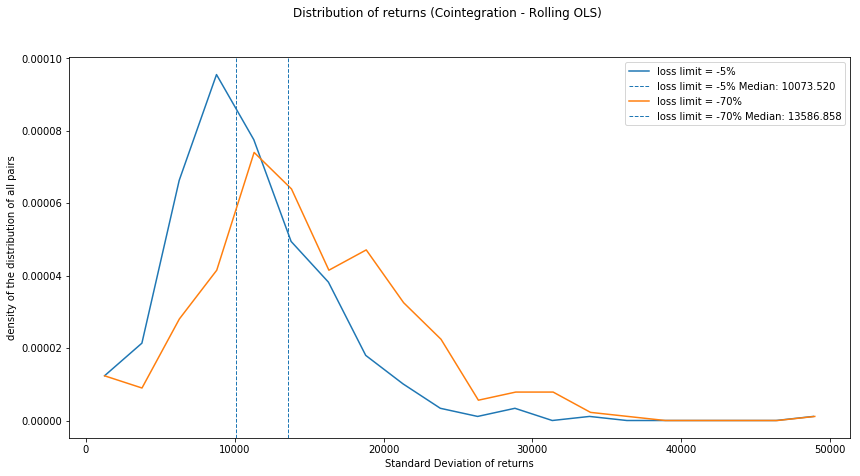

In [128]:
from matplotlib.ticker import PercentFormatter

plot_rs_dist(df['-0.05']['returnstd'], None, 'Distribution of returns (Cointegration - Rolling OLS)', mean=False, median=True, color=None, methodName="loss limit = -5%")
# plot_rs_dist(df['-0.1']['profit'], None, 'fig_title', mean=False, median=True, color=None, methodName="loss limit = -10%")
# plot_rs_dist(df['-0.2']['profit'], None, 'fig_title', mean=False, median=False, color=None, methodName="loss limit = -20%")
# plot_rs_dist(df['-0.3']['profit'], None, 'fig_title', mean=False, median=False, color=None, methodName="loss limit = -30%")
# plot_rs_dist(df['-0.4']['profit'], None, 'fig_title', mean=False, median=False, color=None, methodName="loss limit = -40%")
# plot_rs_dist(df['-0.5']['profit'], None, 'fig_title', mean=False, median=1, color=None, methodName="loss limit = -50%")
# plot_rs_dist(df['-0.6']['profit'], None, 'fig_title', mean=False, median=1, color=None, methodName="loss limit = -60%")
plot_rs_dist(df['-0.7']['returnstd'], None, 'Distribution of returns (Cointegration - Rolling OLS)', mean=False, median=1, color=None, methodName="loss limit = -70%")
# plot_rs_dist(df['-0.8']['profit'], None, 'fig_title', mean=False, median=1, color=None, methodName="loss limit = -80%")
# plot_rs_dist(df['-0.9']['profit'], None, 'fig_title', mean=False, median=1, color=None, methodName="loss limit = -90%")
# plot_rs_dist(df['-1.0']['profit'], None, 'fig_title', mean=False, median=True, color=None, methodName="loss limit = -100%")
# plot_rs_dist(df['-1.5']['profit'], None, 'Distribution of returns', mean=False, median=True, color=None, methodName="loss limit = -150%")
plt.show()

In [129]:
kf_dir = {}
kf_dir['-0.5'] = 'output/grid-search-2019-04-10_00-06-42-697'
kf_dir['-0.05'] = 'output/grid-search-2019-04-10_00-13-18-364'

kf_df = {}
kf_df['-0.5'] = Decoder.get_information_as_df('Performance of this pair', kf_dir['-0.5'])
kf_df['-0.05'] = Decoder.get_information_as_df('Performance of this pair', kf_dir['-0.05'])

Number of pairs: 355
Mean return over all pairs: 6959.7626
Number of pairs: 355
Mean return over all pairs: 4655.7391


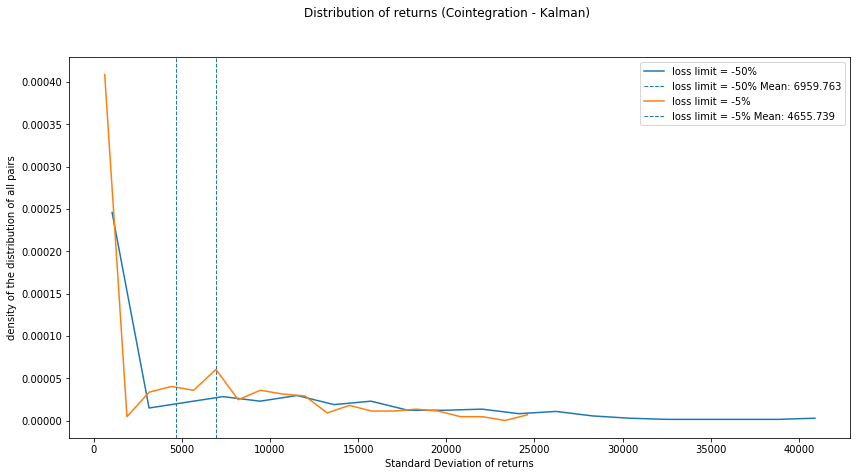

In [130]:
plot_rs_dist(kf_df['-0.5']['returnstd'], None, 'Distribution of returns (Cointegration - Kalman)', mean=1, median=0, color=None, methodName="loss limit = -50%")
plot_rs_dist(kf_df['-0.05']['returnstd'], None, 'Distribution of returns (Cointegration - Kalman)', mean=1, median=0, color=None, methodName="loss limit = -5%")
plt.show()

In [8]:
import datetime 

In [12]:
datetime.datetime.strptime("2018-01-01", "%Y-%m-%d").date()

datetime.date(2018, 1, 1)